# Importing EMA data to convert to Maya-compatible data

We start with sample 0899, which says "Doctors prescribe drugs too freely". From here, we separate every section of the anatomy into distinct elements of the `pos_seq` list. 

In [44]:
import numpy as np
import matplotlib.pyplot as plt

ema_data = np.load('TongueMocapData/ema/npy/0899.npy', allow_pickle=True)
pos_seq = dict()
pos_seq['td'] = ema_data[:, 0:3]    # tongue dorsum
pos_seq['tb'] = ema_data[:, 3:6]    # tongue blade
pos_seq['br'] = ema_data[:, 6:9]    # tongue blade - right
pos_seq['bl'] = ema_data[:, 9:12]   # tongue blade - left
pos_seq['tt'] = ema_data[:, 12:15]  # tongue tip
pos_seq['ul'] = ema_data[:, 15:18]  # upper lip
pos_seq['lc'] = ema_data[:, 18:21]  # lip corner - right
pos_seq['ll'] = ema_data[:, 21:24]  # lower lip
pos_seq['li'] = ema_data[:, 24:27]  # jaw incisor
pos_seq['lj'] = ema_data[:, 27:30]  # jaw parasagittal

In [45]:
# Extracts x, y, or z column based on 0, 1, or 2 dim for any given part in pos_seq
get_col = lambda part, dim : [pos_seq[part][i][dim] for i in range(0, len(pos_seq[part]))]

The main part of exporting to Maya is shifting the coordinates such that they match Maya coordinates. The data coordinates are oriented such that `x` describes back to front, `y` describes right to left, and `z` describes bottom to top. In contrast, Maya has `x` going right to left, `y` going bottom to top, and `z` going back to front. As such, we reorient the coordinates as `(y, z, x)` when exporting to the txt files.

In [63]:
def write_key_txt(part):
    keyframes = []
    xs, ys, zs = get_col(part, 0), get_col(part, 1), get_col(part, 2)

    for i in range(0, len(xs)):
        keyframes.append(f"{i} {ys[i] / 2} {zs[i] / 2} {xs[i] / 2}")

    with open(f'key_data/0899keys_{part}.txt', 'w') as f:
        for line in keyframes:
            f.write(line)
            f.write('\n')

To visualize the parts, we use `matplotlib` and a 3D scatter plot. To center the plots to the origin, we demean based on the total `x`s, `y`s, `z`s.

In [50]:
parts = ["ll", "li", "lj", "tt", "br", "bl", "tb", "td", "lc", "ul"]
sum_xyz = [0, 0, 0]
count_xyz = [0, 0, 0]

for part in parts:
    xs = get_col(part, 0)
    ys = get_col(part, 1)
    zs = get_col(part, 2)

    sum_xyz[0] += (sum(xs))
    sum_xyz[1] += (sum(ys))
    sum_xyz[2] += (sum(zs))

    count_xyz[0] += (len(xs))
    count_xyz[1] += (len(ys))
    count_xyz[2] += (len(zs))

means = [0, 0, 0]
for i in range(0, 3):
    means[i] = sum_xyz[i] / count_xyz[i]

In [56]:
# demeaning process
for part in parts:
    for i in range(0, len(pos_seq[part])):
        pos_seq[part][i] = [pos_seq[part][i][0] - means[0], 
                            pos_seq[part][i][1] - means[1], 
                            pos_seq[part][i][2] - means[2]]

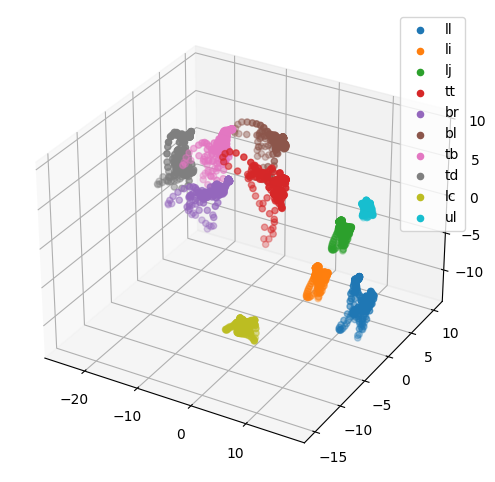

In [61]:
fig = plt.figure(figsize=(10, 6))
ax = plt.axes(projection='3d')

divide_two = lambda xs: [x / 2 for x in xs]

for part in parts:
    xs = divide_two(get_col(part, 0))
    ys = divide_two(get_col(part, 1))
    zs = divide_two(get_col(part, 2))

    ax.scatter(xs, ys, zs, label=part)
ax.legend()
plt.show()

Finding the initial points for the tongue: `(tt, br, bl, tb, td)`

In [62]:
tongue_parts = ['tt', 'br', 'bl', 'tb', 'td']

for part in tongue_parts:
    print(part, divide_two(pos_seq[part][0]))

tt [0.2781981771213822, 0.7147605107566397, 4.248593933003983]
br [-6.783596193906753, -4.133898828506719, 4.5823632261666045]
bl [-5.055244501077308, 6.433027994556357, 4.874468804422568]
tb [-10.501088529656707, 0.521729241365386, 6.6713815225864295]
td [-19.915915589935658, 1.5211451480975677, 2.6620012394058867]


In [65]:
[write_key_txt(part) for part in tongue_parts]

[None, None, None, None, None]